[Final Tutorial Name]
By Jessie Lian
CMSC320 - Final Tutorial

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, datasets
import seaborn as sns

Data Collection:

The datasets we will be concerned with/analyzing have been sourced from the IMDb non-commercial datasets (found at https://developer.imdb.com/non-commercial-datasets/), as a gzipped, TSV file. More specifically, we will be working with "title.basics.tsv", which contains:
- tconst (string) - the alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - the original title, in the original language
- isAdult (boolean) - 0 for non-adult title; 1 for adult title
- startYear (YYYY) – represents the release year of a title. In the case of a TV Series, it is the series' start year
- endYear (YYYY) – the TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – the primary runtime of the title, in minutes
- genres (string array) – includes up to three genres

Below, we have saved the dataset into a dataframes. Let us examine it!

In [7]:
data_basics = pd.read_csv("title.basics.tsv", sep='\t')
data_basics.head()

C:\Users\jlian\AppData\Local\Temp\ipykernel_52348\3681155937.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_basics = pd.read_csv("title.basics.tsv", sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


The second dataset, "title.ratings.tsv", contains:
- tconst (string) - the alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

Again, let us save it into a dataframe and review its contents.

In [9]:
data_ratings = pd.read_csv("title.ratings.tsv", sep='\t')
data_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1971
1,tt0000002,5.8,263
2,tt0000003,6.5,1817
3,tt0000004,5.6,178
4,tt0000005,6.2,2613


While the datasets here are already pretty thorough, it should be noted that the IMDb datasets refresh daily. Feel free to replicate this tutorial with their newer versions.

Now in order to create a more concise dataset, let us condense both dataframes into one. This will also make following calculations more convenient for us.

In [10]:
data_movies = pd.merge(data_basics, data_ratings)
data_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1971
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,263
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1817
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2613


Data Processing

Now as you may have already noticed, this dataframe encompasses a wide variety of media entertainment; that is, tv-series, movies, shorts, etc. But as we are primarily focusing on movies, we must remove all elements that do not qualify.
Of course, afterwards the 'titleType' column also becomes redundant, so we will remove that as well.

In [36]:
df = data_movies
index_list = []
for i, row in df.iterrows():
    if row["titleType"] != "movie":
        index_list.append(i)

df = df.drop(index_list)
df = df.drop(["titleType"], axis = 1)
df.head()

,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,204
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,469
326,tt0000502,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15
358,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,826
366,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,4.4,20


Exploratory Analysis & Data Visualization
Say we are most curious about which genre is the most popular, according to the movies in this dataset. We can visualize this through a bar graph, with the genres on the y-axis and average ratings on the x-axis.

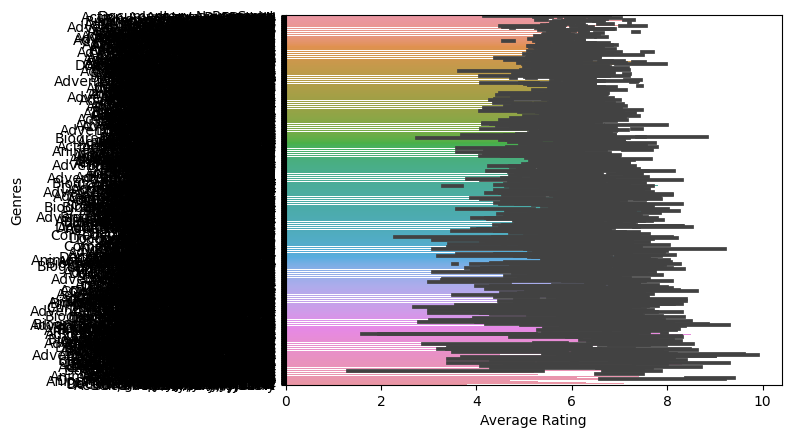

In [55]:
sns.barplot(x = "averageRating", y = "genres", data = df)
plt.ylabel("Genres")
plt.xlabel("Average Rating")
plt.show()

As we can see, the listed genres appear quite cluttered... This is due to the fact that the original dataset appends multiple genres to a single movie. In order to rectify this, we must go through the entire dataframe and build a list of the individual genres anew.
Afterwards, we can re-calculate the average rating of each genre across the dataset.

['Romance', 'Documentary', 'News', 'Sport', '\\N', 'Action', 'Adventure', 'Biography', 'Drama', 'Fantasy', 'Comedy', 'War', 'Crime', 'Family', 'History', 'Sci-Fi', 'Thriller', 'Western', 'Mystery', 'Horror', 'Music', 'Animation', 'Musical', 'Film-Noir', 'Adult', 'Reality-TV', 'Short', 'Talk-Show', 'Game-Show']


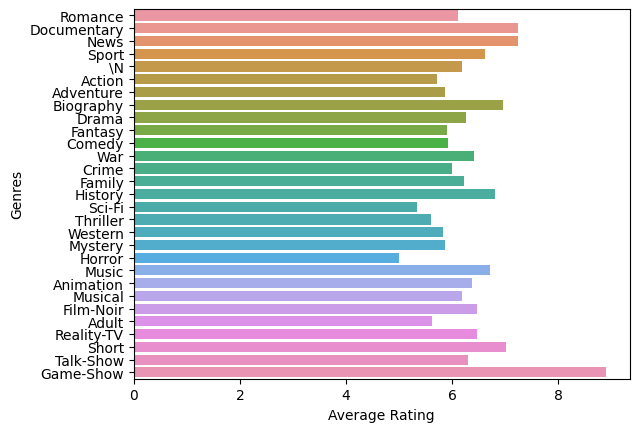

In [57]:
# Constructs a list of all the individual genres.
all_genres = []
for row in df["genres"]:
    g_group = str(row).strip().split(',')
    for g in g_group:
        if g not in all_genres:
            all_genres.append(g)
print(all_genres)

# Calculating frequencies of movies and sum of ratings for eaceh genre.
genre_ratings = {}
for g in all_genres:
    genre_ratings[g] = [0,0]
for i, row in df.iterrows():
    g_group = str(row["genres"]).strip().split(',')
    for g in g_group:
        genre_ratings[g] = [genre_ratings[g][0] + 1, genre_ratings[g][1] + row["averageRating"]]

avg_ratings = []
for k in genre_ratings.keys():
    genre_ratings[k] = [genre_ratings[k][0], genre_ratings[k][1] / genre_ratings[k][0]]
    avg_ratings.append(genre_ratings[k][1])

# Plots the average ratings for all individual genres.
data_x = all_genres
data_y = avg_ratings
sns.barplot(x = avg_ratings, y = all_genres)
plt.ylabel("Genres")
plt.xlabel("Average Rating")
plt.show()


That's more like it!
Now, it appears that game-shows are most popular among critics, and horror the least. Regarding the plot as a whole however, the ratings between all genres appear relatively consistent.
Something that's interesting is the equal average rating among Documentary and News, which could reflect an overlap between genres as the purpose of both is to inform based on real-life events.

Analysis, Hypothesis Testing, & Machine Learning

Insight & Policy Decision